In [1]:
import pandas as pd

In [2]:
houseprice = pd.read_csv("D:\Business Analytics 2\listings1.csv")
houseprice.head()

id                                           name  host_id host_name  \
0     9835                         Beautiful Room & House    33057     Manju   
1  1271310             Stunning Victorian 1 Brm Apartment  6919472  Jonathan   
2   603007        Spacious apartment near Botanic Gardens  2705870   Lindsay   
3    10803  Room in Cool Deco Apartment in Brunswick East    38901   Lindsay   
4   607674                                            NaN  2558288      Alan   

   neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0                  NaN    Manningham -37.77247  145.09232     Private room   
1                  NaN  Port Phillip -37.85876  144.98599  Entire home/apt   
2                  NaN     Melbourne -37.83022  144.98682     Private room   
3                  NaN      Moreland -37.76606  144.97951     Private room   
4                  NaN  Yarra Ranges -37.88388  145.36184  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0     60               1                  4  2015-09-12               0.03   
1    100               2                 22  2020-01-18               0.28   
2     59               1                 21  2020-06-25               0.47   
3     36               4                153  2022-08-09               1.30   
4    275               2                 16  2022-09-03               0.15   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               365                      0   
1                               1                 0                      0   
2                               1                 0                      0   
3                               1               210                      8   
4                               2               362                      3   

   license  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN

In [3]:
houseprice2 = pd.get_dummies(houseprice, columns=["room_type"],drop_first=True)
houseprice2.head()

id                                           name  host_id host_name  \
0     9835                         Beautiful Room & House    33057     Manju   
1  1271310             Stunning Victorian 1 Brm Apartment  6919472  Jonathan   
2   603007        Spacious apartment near Botanic Gardens  2705870   Lindsay   
3    10803  Room in Cool Deco Apartment in Brunswick East    38901   Lindsay   
4   607674                                            NaN  2558288      Alan   

   neighbourhood_group neighbourhood  latitude  longitude  price  \
0                  NaN    Manningham -37.77247  145.09232     60   
1                  NaN  Port Phillip -37.85876  144.98599    100   
2                  NaN     Melbourne -37.83022  144.98682     59   
3                  NaN      Moreland -37.76606  144.97951     36   
4                  NaN  Yarra Ranges -37.88388  145.36184    275   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               1                  4  2015-09-12               0.03   
1               2                 22  2020-01-18               0.28   
2               1                 21  2020-06-25               0.47   
3               4                153  2022-08-09               1.30   
4               2                 16  2022-09-03               0.15   

   calculated_host_listings_count  availability_365  number_of_reviews_ltm  \
0                               1               365                      0   
1                               1                 0                      0   
2                               1                 0                      0   
3                               1               210                      8   
4                               2               362                      3   

   license  room_type_Hotel room  room_type_Private room  \
0      NaN                     0                       1   
1      NaN                     0                       0   
2      NaN                     0                       1   
3      NaN                     0                       1   
4      NaN                     0                       0   

   room_type_Shared room  
0                      0  
1                      0  
2                      0  
3                      0  
4                      0

In [4]:
houseprice2["reviews_per_month"].fillna(0, inplace= True) #reviews per month have blank value -> convert to 0

In [5]:
import statsmodels.api as sm 

In [6]:
houseprice2.columns.get_loc("price")

8

In [7]:
y = houseprice2.iloc[:,8]

In [8]:
x = houseprice2.iloc[:,[6,7,9,10,12,13,14,15,17,18,19]]
x

latitude  longitude  minimum_nights  number_of_reviews  \
0     -37.77247  145.09232               1                  4   
1     -37.85876  144.98599               2                 22   
2     -37.83022  144.98682               1                 21   
3     -37.76606  144.97951               4                153   
4     -37.88388  145.36184               2                 16   
...         ...        ...             ...                ...   
18231 -37.57250  145.64223               2                 12   
18232 -37.52927  145.33519               1                 69   
18233 -37.53405  145.35107               2                 87   
18234 -37.53035  145.33727               1                 25   
18235 -37.65600  144.50662               2                  3   

       reviews_per_month  calculated_host_listings_count  availability_365  \
0                   0.03                               1               365   
1                   0.28                               1                 0   
2                   0.47                               1                 0   
3                   1.30                               1               210   
4                   0.15                               2               362   
...                  ...                             ...               ...   
18231               0.60                               3               275   
18232               1.54                               6               258   
18233               1.78                               1               167   
18234               0.55                               6               262   
18235               0.14                               2               361   

       number_of_reviews_ltm  room_type_Hotel room  room_type_Private room  \
0                          0                     0                       1   
1                          0                     0                       0   
2                          0                     0                       1   
3                          8                     0                       1   
4                          3                     0                       0   
...                      ...                   ...                     ...   
18231                      7                     0                       0   
18232                     16                     0                       0   
18233                     11                     0                       0   
18234                      9                     0                       0   
18235                      1                     0                       0   

       room_type_Shared room  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  
...                      ...  
18231                      0  
18232                      0  
18233                      0  
18234                      0  
18235                      0  

[18236 rows x 11 columns]

In [9]:
x_c = sm.add_constant(x)

In [10]:
reg= sm. OLS(y, x_c).fit()   
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     19.58
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           8.61e-40
Time:                        16:21:45   Log-Likelihood:            -1.5009e+05
No. Observations:               18236   AIC:                         3.002e+05
Df Residuals:                   18224   BIC:                         3.003e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

## multicolinearity

In [11]:
from statsmodels.stats .outliers_influence import variance_inflation_factor as vif

In [12]:
vif_factor = [vif(x.values,i) for i in range (0,x.shape[1])]
vif_factor

[211984.5180803761,
 212078.2981844823,
 1.0454813230475872,
 2.2053410350522094,
 4.090331677850629,
 1.1587450675388569,
 1.9415911292030794,
 4.043427727156641,
 1.0110479715006078,
 1.4973173624340905,
 1.0265450808497878]

In [13]:
pd.DataFrame({"Variable": x.columns, "VIF Factor": vif_factor}) #tao table vs 2 value

Variable     VIF Factor
0                         latitude  211984.518080
1                        longitude  212078.298184
2                   minimum_nights       1.045481
3                number_of_reviews       2.205341
4                reviews_per_month       4.090332
5   calculated_host_listings_count       1.158745
6                 availability_365       1.941591
7            number_of_reviews_ltm       4.043428
8             room_type_Hotel room       1.011048
9           room_type_Private room       1.497317
10           room_type_Shared room       1.026545

In [14]:
corrs = x.corr()

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

<AxesSubplot:>

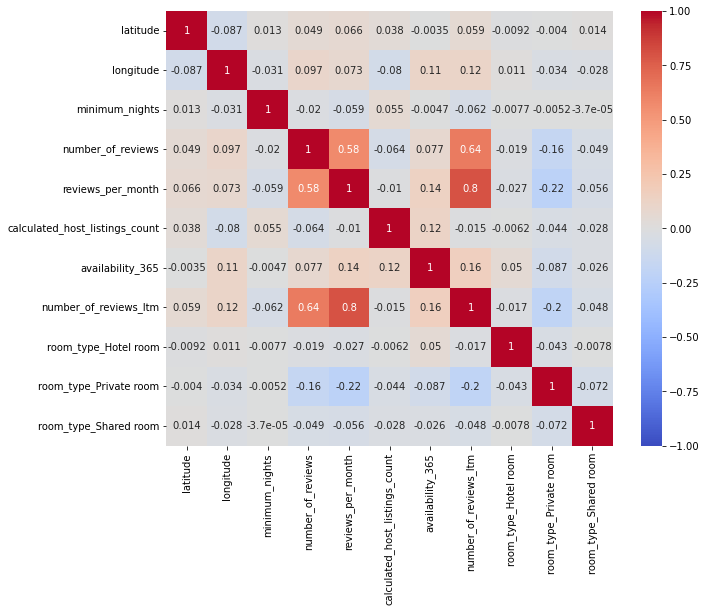

In [16]:
plt.rcParams['figure.figsize'] = [10, 8]
sns.heatmap(corrs, vmin=-1, vmax=1, center = 0, cmap = "coolwarm", annot = True)

In [17]:
x2 = houseprice2.iloc[:,[7,9,10,12,13,14,15,17,18,19]]

In [18]:
[vif(x2.values,i) for i in range (0,x2.shape[1])]

[3.119847487125043,
 1.0454672996899892,
 2.2036548992550085,
 4.090036993481212,
 1.1587312066749913,
 1.9393749795733242,
 4.036999546500537,
 1.0110408136064877,
 1.4972572606422263,
 1.0264914790046766]

Correct reg model

In [19]:
x2 = houseprice2.iloc[:,[7,9,10,12,13,14,15,17,18,19]]
x2_c = sm.add_constant(x2)
reg2 = sm.OLS(y, x2_c).fit()

In [20]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     21.53
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.82e-40
Time:                        16:21:50   Log-Likelihood:            -1.5009e+05
No. Observations:               18236   AIC:                         3.002e+05
Df Residuals:                   18225   BIC:                         3.003e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

final model?

In [21]:
x3 = houseprice2.iloc[:,[7,9,14,18,19]]
x3_c = sm.add_constant(x3)
reg3 = sm.OLS(y, x3_c).fit()
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     35.88
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.10e-36
Time:                        16:21:50   Log-Likelihood:            -1.5011e+05
No. Observations:               18236   AIC:                         3.002e+05
Df Residuals:                   18230   BIC:                         3.003e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -1.85

so the price of room depends on the longitude, minimum_nights, availability, room_type private and sharedroom ()

In [22]:
residual = reg3.resid

In [23]:
sm.stats.het_breuschpagan(residual, x2)

(13.244551893972478,
 0.15184917344090884,
 1.3246910079377314,
 0.21029416071081755)